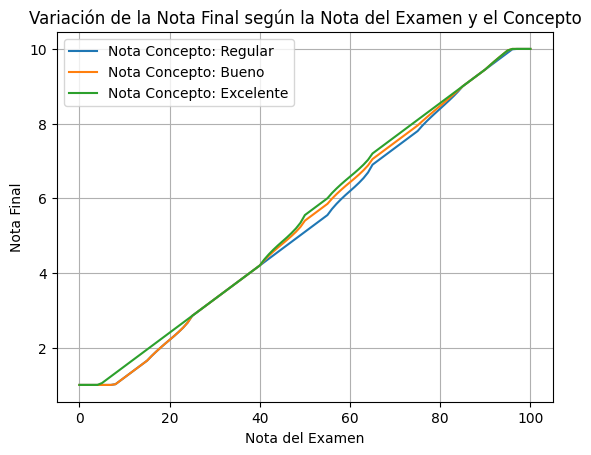

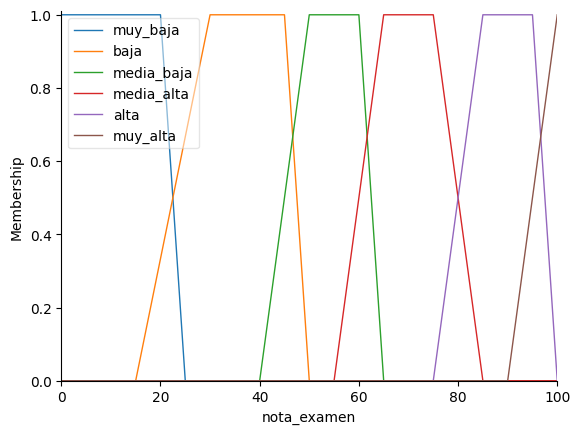

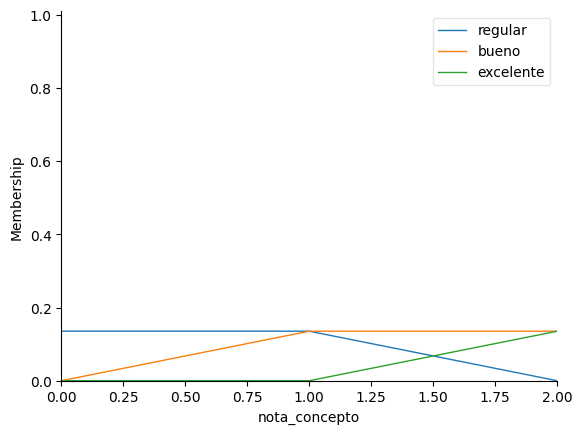

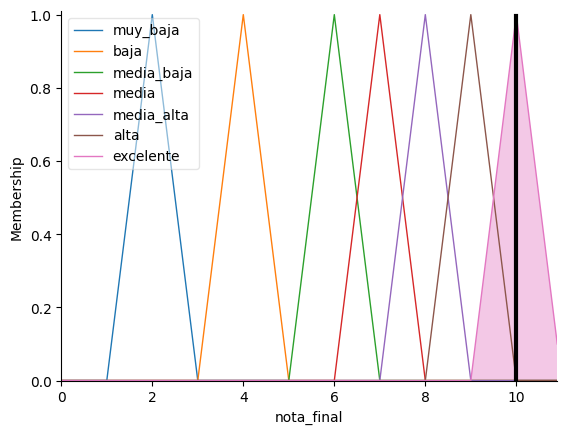

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definir las variables de entrada y salida
nota_examen = ctrl.Antecedent(np.arange(0, 101, 1), 'nota_examen')
nota_concepto = ctrl.Antecedent(np.arange(0, 3, 1), 'nota_concepto')
nota_final = ctrl.Consequent(np.arange(0, 11, 0.1), 'nota_final')  # Rango hasta 11

# Conjuntos trapezoidales para nota_examen
nota_examen['muy_baja'] = fuzz.trapmf(nota_examen.universe, [0, 0, 20, 25])
nota_examen['baja'] = fuzz.trapmf(nota_examen.universe, [15, 30, 45, 50])
nota_examen['media_baja'] = fuzz.trapmf(nota_examen.universe, [40, 50, 60, 65])
nota_examen['media_alta'] = fuzz.trapmf(nota_examen.universe, [55, 65, 75, 85])
nota_examen['alta'] = fuzz.trapmf(nota_examen.universe, [75, 85, 95, 100])
nota_examen['muy_alta'] = fuzz.trapmf(nota_examen.universe, [90, 100, 100, 100])

# Conjuntos gaussianos para nota_concepto
nota_concepto['regular'] = fuzz.gaussmf(nota_concepto.universe, 0.5, 0.25)
nota_concepto['bueno'] = fuzz.gaussmf(nota_concepto.universe, 1.5, 0.25)
nota_concepto['excelente'] = fuzz.gaussmf(nota_concepto.universe, 2.5, 0.25)

# Redefinimos los conjuntos para la nota final con más valores intermedios
nota_final['muy_baja'] = fuzz.trimf(nota_final.universe, [1, 2, 3])
nota_final['baja'] = fuzz.trimf(nota_final.universe, [3, 4, 5])
nota_final['media_baja'] = fuzz.trimf(nota_final.universe, [5, 6, 7])
nota_final['media'] = fuzz.trimf(nota_final.universe, [6, 7, 8])
nota_final['media_alta'] = fuzz.trimf(nota_final.universe, [7, 8, 9])
nota_final['alta'] = fuzz.trimf(nota_final.universe, [8, 9, 10])
nota_final['excelente'] = fuzz.trimf(nota_final.universe, [9, 10, 11])

# Definir las reglas ajustadas para menor influencia del concepto
reglas = [
    # Nota muy alta
    ctrl.Rule(nota_examen['muy_alta'] & nota_concepto['excelente'], nota_final['excelente']),
    ctrl.Rule(nota_examen['muy_alta'] & nota_concepto['bueno'], nota_final['excelente']),
    ctrl.Rule(nota_examen['muy_alta'] & nota_concepto['regular'], nota_final['alta']),
    # Nota alta
    ctrl.Rule(nota_examen['alta'] & nota_concepto['excelente'], nota_final['alta']),
    ctrl.Rule(nota_examen['alta'] & nota_concepto['bueno'], nota_final['alta']),
    ctrl.Rule(nota_examen['alta'] & nota_concepto['regular'], nota_final['alta']),
    # Nota media alta
    ctrl.Rule(nota_examen['media_alta'] & nota_concepto['excelente'], nota_final['alta']),
    ctrl.Rule(nota_examen['media_alta'] & nota_concepto['bueno'], nota_final['media_alta']),
    ctrl.Rule(nota_examen['media_alta'] & nota_concepto['regular'], nota_final['media']),
    # Nota media baja
    ctrl.Rule(nota_examen['media_baja'] & nota_concepto['excelente'], nota_final['media']),
    ctrl.Rule(nota_examen['media_baja'] & nota_concepto['bueno'], nota_final['media_baja']),
    ctrl.Rule(nota_examen['media_baja'] & nota_concepto['regular'], nota_final['baja']),
    # Nota baja
    ctrl.Rule(nota_examen['baja'] & nota_concepto['excelente'], nota_final['baja']),
    ctrl.Rule(nota_examen['baja'] & nota_concepto['bueno'], nota_final['baja']),
    ctrl.Rule(nota_examen['baja'] & nota_concepto['regular'], nota_final['baja']),
    # Nota muy baja
    ctrl.Rule(nota_examen['muy_baja'] & nota_concepto['excelente'], nota_final['baja']),
    ctrl.Rule(nota_examen['muy_baja'] & nota_concepto['bueno'], nota_final['muy_baja']),
    ctrl.Rule(nota_examen['muy_baja'] & nota_concepto['regular'], nota_final['muy_baja']),

]
# Crear el sistema de control
sistema_control = ctrl.ControlSystem(reglas)
simulador = ctrl.ControlSystemSimulation(sistema_control)


def calcula_nota_final(nota_examen, nota_concepto):
    simulador.input['nota_examen'] = nota_examen
    simulador.input['nota_concepto'] = nota_concepto
    simulador.compute()
    nota_fuzzy = simulador.output['nota_final']
    if (nota_concepto==0):
      return (max(1, min(10, -nota_fuzzy*0.1+nota_examen*.09)))
    else:
      return (max(1, min(10, nota_fuzzy*0.15+nota_examen*.09)))


def generar_datos_y_graficar(nota_concepto):
    notas_examen = np.arange(0, 101)
    notas_finales = []
    for nota in notas_examen:
        nota_final = calcula_nota_final(nota, nota_concepto)
        notas_finales.append(nota_final)
    return notas_examen, notas_finales

# Generar datos y graficar en un solo gráfico
notas_examen, notas_finales_regular = generar_datos_y_graficar('regular')
_, notas_finales_bueno = generar_datos_y_graficar('bueno')
_, notas_finales_excelente = generar_datos_y_graficar('excelente')

# Crear el gráfico
plt.plot(notas_examen, notas_finales_regular, label='Nota Concepto: Regular')
plt.plot(notas_examen, notas_finales_bueno, label='Nota Concepto: Bueno')
plt.plot(notas_examen, notas_finales_excelente, label='Nota Concepto: Excelente')

plt.xlabel("Nota del Examen")
plt.ylabel("Nota Final")
plt.title("Variación de la Nota Final según la Nota del Examen y el Concepto")
plt.legend()
plt.grid(True)
plt.show()

# Generar gráficos para diferentes notas conceptuales
generar_datos_y_graficar('regular')
generar_datos_y_graficar('bueno')
generar_datos_y_graficar('excelente')

nota_examen.view()
nota_concepto.view()
nota_final.view(sim=simulador)

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 1.7 MB/s eta 0:00:00
